In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importing the data set
from google.colab import files
upload = files.upload()

Saving 20220413_Northeastern_AwanTunai_Capstone_Data.csv to 20220413_Northeastern_AwanTunai_Capstone_Data.csv


In [4]:
#Reading the dataset
AwanTunai = pd.read_csv('20220413_Northeastern_AwanTunai_Capstone_Data.csv')
AwanTunai.head()

,id,order_id,merchant_id,sku_id,date,top_cat_id,sub_cat_id,price
0,654713,82186,1754,981,2021-06-29,7.0,44.0,877000.0
1,654712,82186,1754,23060,2021-06-29,7.0,44.0,877000.0
2,654711,82186,1754,1548,2021-06-29,7.0,44.0,877000.0
3,654714,82186,1754,1969,2021-06-29,7.0,44.0,877000.0
4,654687,82186,1754,343,2021-06-29,7.0,44.0,312000.0


In [5]:
AwanTunai.tail()

,id,order_id,merchant_id,sku_id,date,top_cat_id,sub_cat_id,price
18550,1854562,226313,1519,2063,2021-12-21,NaN,NaN,104500.0
18551,1854564,226313,1519,2012,2021-12-21,NaN,NaN,45500.0
18552,1831922,226313,1519,688,2021-12-21,NaN,NaN,131500.0
18553,1831645,226313,1519,15333,2021-12-21,NaN,NaN,108000.0
18554,1832087,226313,1519,5062,2021-12-21,NaN,NaN,59500.0


In [6]:
len(AwanTunai)

18555

In [7]:
AwanTunai.shape

(18555, 8)

In [8]:
AwanTunai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18555 entries, 0 to 18554
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           18555 non-null  int64  
 1   order_id     18555 non-null  int64  
 2   merchant_id  18555 non-null  int64  
 3   sku_id       18555 non-null  int64  
 4   date         18555 non-null  object 
 5   top_cat_id   16347 non-null  float64
 6   sub_cat_id   16347 non-null  float64
 7   price        18555 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.1+ MB


In [9]:
AwanTunai.columns

Index(['id', 'order_id', 'merchant_id', 'sku_id', 'date', 'top_cat_id',
       'sub_cat_id', 'price'],
      dtype='object')

In [10]:
AwanTunai.describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,price
count,1.855500e+04,18555.000000,18555.000000,18555.000000,16347.000000,16347.000000,1.855500e+04
mean,1.305701e+06,160114.476314,1815.086607,6175.564646,4.987704,24.735731,1.388808e+05
std,3.634450e+05,44882.374703,437.791839,7862.438238,4.669975,19.448713,5.085993e+05
min,4.407870e+05,55780.000000,875.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.061536e+06,129518.000000,1477.000000,415.000000,0.000000,12.000000,4.300000e+04
50%,1.301516e+06,158683.000000,1758.000000,2037.000000,5.000000,18.000000,1.020000e+05
75%,1.597224e+06,196004.000000,2139.000000,12426.000000,7.000000,28.000000,1.790000e+05
max,1.958354e+06,242390.000000,3114.000000,23756.000000,29.000000,82.000000,5.875000e+07


In [11]:
AwanTunai.nunique()

id             18555
order_id        2794
merchant_id      505
sku_id           735
date             187
top_cat_id        29
sub_cat_id        83
price            685
dtype: int64

In [12]:
AwanTunai.isnull().sum()

id                0
order_id          0
merchant_id       0
sku_id            0
date              0
top_cat_id     2208
sub_cat_id     2208
price             0
dtype: int64

We can see that there are 2208 null values in 'top_cat_id' and 'sub_cat_id'.

In [13]:
#Removing these null values
AwanTunai.dropna(inplace=True)

In [14]:
#Counting the frequency
freq = AwanTunai['merchant_id'].value_counts()
print(freq)

1607    516
1196    363
1523    292
1477    287
1156    249
       ... 
1519      3
2213      3
2580      2
2313      1
3104      1
Name: merchant_id, Length: 495, dtype: int64


In [15]:
#Grouping by 'merchant_id'
gk = AwanTunai.groupby('merchant_id').agg({'price': ['mean', 'min', 'max']})
print("Mean, min, and max values of Purchase Amount grouped by Merchant id")
print(gk)

Mean, min, and max values of Purchase Amount grouped by Merchant id
                     price                    
                      mean       min       max
merchant_id                                   
875          118390.625000   13500.0  575000.0
1016         100900.000000   45500.0  196000.0
1041         134118.750000   17700.0  395000.0
1103         141853.125000    4850.0  575000.0
1156         175352.208835       0.0  883000.0
...                    ...       ...       ...
2954         191000.000000  170000.0  232000.0
2973          56437.500000   36000.0  108000.0
3075          91500.000000   91500.0   91500.0
3104         164000.000000  164000.0  164000.0
3114         170583.333333  155000.0  185500.0

[495 rows x 3 columns]


In [16]:
#Creating data frame
df = pd.DataFrame(AwanTunai)

In [17]:
#mean price spent by the top 5 frequent merchants
mean_values = df.groupby('merchant_id', as_index=False)['price'].mean()
mean_1607 = mean_values.loc[mean_values['merchant_id'] == 1607]
print(mean_1607)

    merchant_id          price
94         1607  160245.962532


In [18]:
mean_values.loc[mean_values['merchant_id'] == 1477]

,merchant_id,price
64,1477,136586.585366


In [19]:
mean_values.loc[mean_values['merchant_id'] == 1196]

,merchant_id,price
12,1196,124095.179063


In [20]:
df['order_id'].value_counts()[:5]

119929    183
82186      94
105642     92
150035     92
116654     76
Name: order_id, dtype: int64

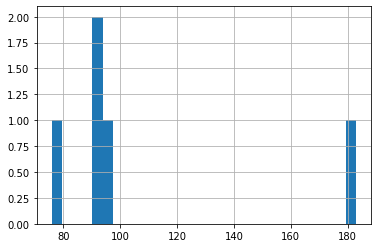

In [21]:
df['order_id'].value_counts()[:5].hist(bins=30)

In [22]:
#Correaltion b/w attributes
AwanTunai.corr()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,price
id,1.000000,0.997886,0.155179,-0.016225,-0.005791,-0.018447,0.015410
order_id,0.997886,1.000000,0.155718,-0.017221,-0.007604,-0.018911,0.015534
merchant_id,0.155179,0.155718,1.000000,-0.019864,-0.030743,-0.051571,0.014967
sku_id,-0.016225,-0.017221,-0.019864,1.000000,0.020028,0.112809,-0.031485
top_cat_id,-0.005791,-0.007604,-0.030743,0.020028,1.000000,0.540630,-0.006254
sub_cat_id,-0.018447,-0.018911,-0.051571,0.112809,0.540630,1.000000,-0.003238
price,0.015410,0.015534,0.014967,-0.031485,-0.006254,-0.003238,1.000000


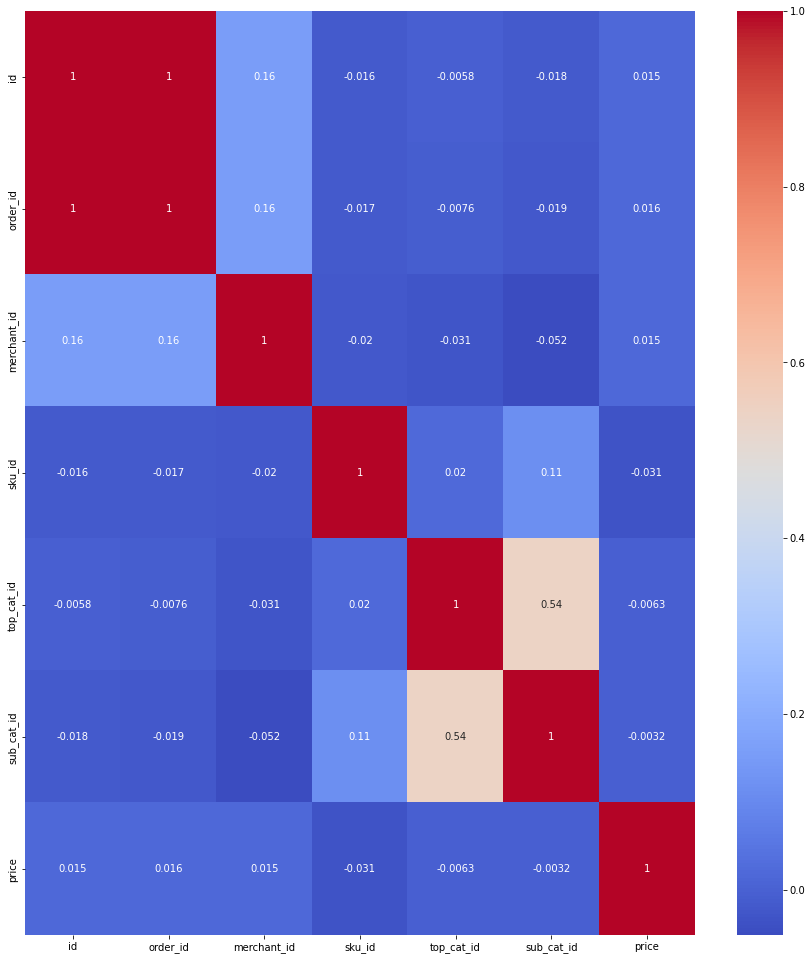

In [23]:
#Correlation plot
plt.figure(figsize=(15,17)) 
sns.heatmap(AwanTunai.corr(),annot=True, cmap='coolwarm')


In [24]:
#Creating new column
df[['date']]=df[['date']].apply(pd.to_datetime)
df['month'] = df['date'].dt.month
df.head()

,id,order_id,merchant_id,sku_id,date,top_cat_id,sub_cat_id,price,month
0,654713,82186,1754,981,2021-06-29,7.0,44.0,877000.0,6
1,654712,82186,1754,23060,2021-06-29,7.0,44.0,877000.0,6
2,654711,82186,1754,1548,2021-06-29,7.0,44.0,877000.0,6
3,654714,82186,1754,1969,2021-06-29,7.0,44.0,877000.0,6
4,654687,82186,1754,343,2021-06-29,7.0,44.0,312000.0,6


In [25]:
merchant_sku = df.groupby(['merchant_id','sku_id'], as_index = True).agg({'count'}).reset_index()

In [26]:
merchant_sku

,merchant_id,sku_id,id,order_id,date,top_cat_id,sub_cat_id,price,month
,,,count,count,count,count,count,count,count
0,875,4,1,1,1,1,1,1,1
1,875,8,1,1,1,1,1,1,1
2,875,60,1,1,1,1,1,1,1
3,875,105,1,1,1,1,1,1,1
4,875,232,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
11211,3075,6630,2,2,2,2,2,2,2
11212,3075,9753,1,1,1,1,1,1,1
11213,3104,2936,1,1,1,1,1,1,1


In [27]:
frequency_df = df.groupby(
    by=['merchant_id'], as_index=False)['date'].count()
frequency_df.columns = ['merchant_id', 'Frequency']
frequency_df.head()

,merchant_id,Frequency
0,875,32
1,1016,5
2,1041,8
3,1103,48
4,1156,249


In [28]:
most_frq_buyers = merchant_sku.merchant_id.value_counts().sort_values(ascending = False)

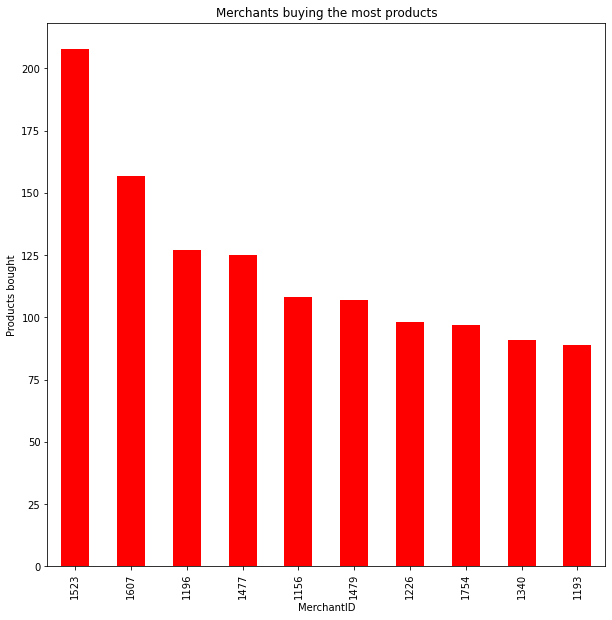

In [29]:
#Top 10 most frequent buyers
most_frq_buyers.head(10).plot(kind = 'bar', figsize = (10,10), title = "Merchants buying the most products", xlabel = "MerchantID", ylabel = "Products bought", color = "red")

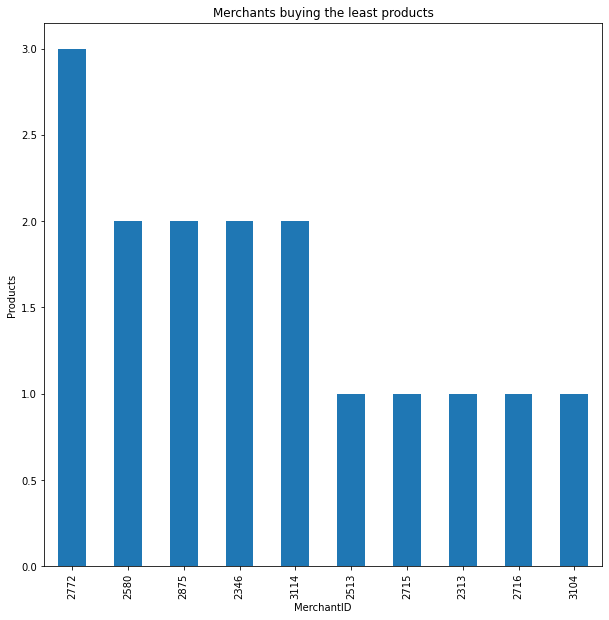

In [ ]:
#Least 10 buyers
most_frq_buyers.tail(10).plot(kind = 'bar', figsize = (10,10), title = 'Merchants buying the least products', xlabel = "MerchantID", ylabel = "Products")

In [ ]:
#Merchants repeating purchases
merchant_repeating = merchant_sku.id.value_counts()
merchant_repeating

count
1        8149
2        1994
3         597
4         247
5          95
6          64
7          32
8          22
9           5
11          4
10          3
12          2
14          1
15          1
dtype: int64

In [ ]:
merchant_sku = df.groupby(['merchant_id', 'sku_id', 'month'], as_index= True).agg({'count'})
merchant_sku

id order_id  date top_cat_id sub_cat_id price  \
                         count    count count      count      count count   
merchant_id sku_id month                                                    
875         4      11        1        1     1          1          1     1   
            8      11        1        1     1          1          1     1   
            60     12        1        1     1          1          1     1   
            105    11        1        1     1          1          1     1   
            232    11        2        2     2          2          2     2   
...                        ...      ...   ...        ...        ...   ...   
3104        2936   12        1        1     1          1          1     1   
3114        1204   10        1        1     1          1          1     1   
                   11        2        2     2          2          2     2   
            2740   10        1        1     1          1          1     1   
                   11        2        2     2          2          2     2   

                          year  
                         count  
merchant_id sku_id month        
875         4      11        1  
            8      11        1  
            60     12        1  
            105    11        1  
            232    11        2  
...                        ...  
3104        2936   12        1  
3114        1204   10        1  
                   11        2  
            2740   10        1  
                   11        2  

[13853 rows x 7 columns]

In [ ]:
merchant_sku = df.groupby(['merchant_id', 'sku_id'], as_index= True).agg({'count'})
merchant_sku

id order_id  date top_cat_id sub_cat_id price month
                   count    count count      count      count count count
merchant_id sku_id                                                       
875         4          1        1     1          1          1     1     1
            8          1        1     1          1          1     1     1
            60         1        1     1          1          1     1     1
            105        1        1     1          1          1     1     1
            232        2        2     2          2          2     2     2
...                  ...      ...   ...        ...        ...   ...   ...
3075        6630       2        2     2          2          2     2     2
            9753       1        1     1          1          1     1     1
3104        2936       1        1     1          1          1     1     1
3114        1204       3        3     3          3          3     3     3
            2740       3        3     3          3          3     3     3

[11216 rows x 7 columns]

In [ ]:
df = df.sort_values('date', ascending = True)
df = df.dropna(how='any')
df['year'] = df['date'].dt.year
df.head()


,id,order_id,merchant_id,sku_id,date,top_cat_id,sub_cat_id,price,month,year
7931,513232,65442,2738,400,2021-05-06,3.0,3.0,0.0,5,2021
2710,513885,65562,2647,2295,2021-05-06,0.0,19.0,0.0,5,2021
4463,513228,65441,2252,720,2021-05-06,0.0,17.0,0.0,5,2021
4465,513412,65488,1877,16065,2021-05-06,0.0,17.0,0.0,5,2021
2711,513886,65562,2647,2317,2021-05-06,0.0,19.0,0.0,5,2021


**Comparing merchant id's**

In [ ]:
df.groupby(['merchant_id', 'sku_id'], as_index= True).count()


id  order_id  date  top_cat_id  sub_cat_id  price  month  \
merchant_id sku_id                                                             
875         4        1         1     1           1           1      1      1   
            8        1         1     1           1           1      1      1   
            60       1         1     1           1           1      1      1   
            105      1         1     1           1           1      1      1   
            232      2         2     2           2           2      2      2   
...                 ..       ...   ...         ...         ...    ...    ...   
3075        6630     2         2     2           2           2      2      2   
            9753     1         1     1           1           1      1      1   
3104        2936     1         1     1           1           1      1      1   
3114        1204     3         3     3           3           3      3      3   
            2740     3         3     3           3           3      3      3   

                    year  
merchant_id sku_id        
875         4          1  
            8          1  
            60         1  
            105        1  
            232        2  
...                  ...  
3075        6630       2  
            9753       1  
3104        2936       1  
3114        1204       3  
            2740       3  

[11216 rows x 8 columns]

In [ ]:
df875 = df[df['merchant_id']==875]
df875 = pd.pivot_table(df875, index = ['sku_id','month','order_id'], aggfunc = ['count'])
df875

count                                                
                       date id merchant_id price sub_cat_id top_cat_id year
sku_id month order_id                                                      
4      11    189135       1  1           1     1          1          1    1
8      11    179014       1  1           1     1          1          1    1
60     12    210448       1  1           1     1          1          1    1
105    11    193034       1  1           1     1          1          1    1
232    11    178936       1  1           1     1          1          1    1
             192722       1  1           1     1          1          1    1
253    11    192722       1  1           1     1          1          1    1
306    11    178936       1  1           1     1          1          1    1
400    11    178936       1  1           1     1          1          1    1
468    11    193034       1  1           1     1          1          1    1
551    12    210448       1  1           1     1          1          1    1
643    11    161145       1  1           1     1          1          1    1
688    11    161145       1  1           1     1          1          1    1
1233   11    189135       1  1           1     1          1          1    1
1558   12    210448       1  1           1     1          1          1    1
1589   12    210448       1  1           1     1          1          1    1
2012   11    179014       1  1           1     1          1          1    1
2037   12    210448       1  1           1     1          1          1    1
2166   11    179014       1  1           1     1          1          1    1
3019   11    161145       1  1           1     1          1          1    1
3880   11    161145       1  1           1     1          1          1    1
5062   11    189135       1  1           1     1          1          1    1
15333  11    178936       1  1           1     1          1          1    1
       12    210448       1  1           1     1          1          1    1
15830  11    161145       1  1           1     1          1          1    1
15831  11    178936       1  1           1     1          1          1    1
16373  11    179014       1  1           1     1          1          1    1
             192722       1  1           1     1          1          1    1
19426  11    161145       1  1           1     1          1          1    1
19972  11    178936       1  1           1     1          1          1    1
22252  11    179014       1  1           1     1          1          1    1
23579  11    179014       1  1           1     1          1          1    1

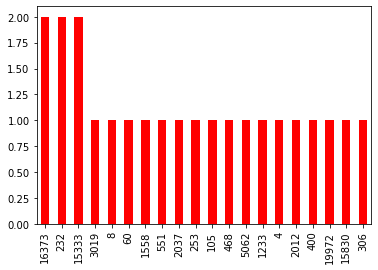

In [ ]:
df[df['merchant_id']==875].sku_id.value_counts()[:20].plot(kind='bar', color = 'Red')

In [ ]:
df1523 = df[df['merchant_id']==1523]
df1523 = pd.pivot_table(df1523, index = ['sku_id','month','order_id'], aggfunc = ['count'])
df1523

count                                                
                       date id merchant_id price sub_cat_id top_cat_id year
sku_id month order_id                                                      
2      10    150035       2  2           2     2          2          2    2
3      9     119929       4  4           4     4          4          4    4
       10    150035       3  3           3     3          3          3    3
4      9     119929       3  3           3     3          3          3    3
       10    150035       2  2           2     2          2          2    2
...                     ... ..         ...   ...        ...        ...  ...
23281  9     119929       1  1           1     1          1          1    1
23456  9     119929       1  1           1     1          1          1    1
23747  9     119929       1  1           1     1          1          1    1
       10    150035       1  1           1     1          1          1    1
23749  9     119929       1  1           1     1          1          1    1

[277 rows x 7 columns]

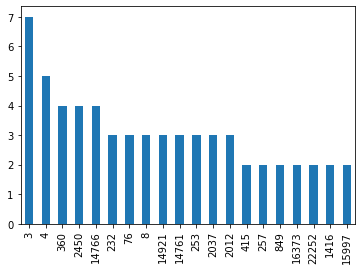

In [ ]:
df[df['merchant_id']==1523].sku_id.value_counts()[:20].plot(kind='bar')

In [ ]:
df[df['merchant_id']==3114]

,id,order_id,merchant_id,sku_id,date,top_cat_id,sub_cat_id,price,month,year
15999,1133407,138832,3114,1204,2021-10-14,3.0,5.0,178500.0,10,2021
15996,1133408,138832,3114,2740,2021-10-14,3.0,5.0,155000.0,10,2021
15997,1310180,160446,3114,2740,2021-11-02,3.0,5.0,158000.0,11,2021
16000,1310179,160446,3114,1204,2021-11-02,3.0,5.0,184500.0,11,2021
16001,1524667,187745,3114,1204,2021-11-24,3.0,5.0,185500.0,11,2021
15998,1524666,187745,3114,2740,2021-11-24,3.0,5.0,162000.0,11,2021


In [ ]:
df3114 = df[df['merchant_id']==3114]
df3114 = pd.pivot_table(df3114, index = ['sku_id','month','order_id'], aggfunc = ['count'])
df3114

count                                                
                       date id merchant_id price sub_cat_id top_cat_id year
sku_id month order_id                                                      
1204   10    138832       1  1           1     1          1          1    1
       11    160446       1  1           1     1          1          1    1
             187745       1  1           1     1          1          1    1
2740   10    138832       1  1           1     1          1          1    1
       11    160446       1  1           1     1          1          1    1
             187745       1  1           1     1          1          1    1

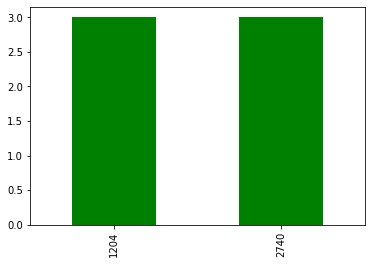

In [ ]:
df[df['merchant_id']==3114].sku_id.value_counts().head(20).plot(kind='bar', color = 'green')

**Comparing sku_id**

In [ ]:
df['sku_id'].value_counts()[:5]

2037    433
360     404
8       397
468     354
1558    291
Name: sku_id, dtype: int64

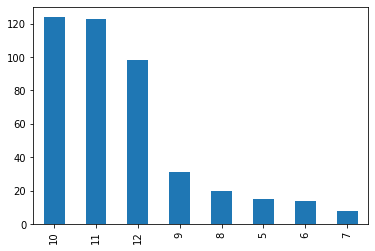

In [ ]:
df[df['sku_id']==2037].month.value_counts().head(20).plot(kind='bar')

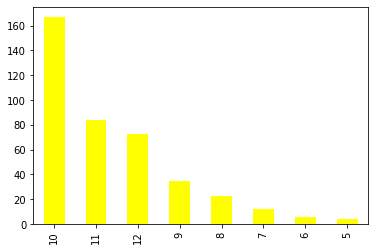

In [ ]:
df[df['sku_id']==360].month.value_counts().head(20).plot(kind='bar', color = 'yellow')